<a href="https://colab.research.google.com/github/samsung-ai-course/6-7-edition/blob/main/Supervised%20Learning/Cross_Validation_Iris_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Validation Examples with the Iris Dataset


In this notebook, we demonstrate how to use cross-validation to evaluate the performance of machine learning models using the Iris dataset.
Cross-validation helps provide a more reliable estimate of model performance by testing on multiple data splits.


In [1]:

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets for context
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Step 1: Create Models
We will use two models for this demonstration:
- **K-Nearest Neighbors (KNN)** with \( k=3 \).
- **Decision Tree Classifier** with default hyperparameters.

P.s We will be exploring further decision trees in a future class. Its a very interesting algorithm!


In [2]:

# Create classifiers
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)



### Step 2: Perform Cross-Validation
We perform 5-fold cross-validation for both models. This splits the dataset into 5 subsets (folds) and tests the model on a different fold in each iteration, training on the other 4 folds.


In [3]:

# Perform cross-validation for KNN
knn_cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation

# Perform cross-validation for Decision Tree
dt_cv_scores = cross_val_score(decision_tree, X, y, cv=5)  # 5-fold cross-validation



### Step 3: Analyze Results
For each model, we calculate:
- **Mean Cross-Validation Accuracy**: Average accuracy across all folds.
- **Standard Deviation of Accuracy**: Variation in accuracy between folds.

### Model Performance Evaluation on the Iris Dataset

#### Key Metrics:
1. **Mean Cross-Validation Accuracy**:
   - The average accuracy obtained across different folds in cross-validation.
   - Indicates how well the model generalizes to unseen data. A higher value is better.

2. **Standard Deviation of Accuracy**:
   - Measures the variability of accuracy across different folds.
   - Lower values mean the model performs consistently across the dataset.

#### Understanding Model Behaviors:
- **Underfitting**:
  - Occurs when the model is too simple to capture the patterns in the data.
  - Results in poor performance on both training and validation datasets.
  
- **Overfitting**:
  - Happens when the model is too complex, capturing noise or irrelevant patterns.
  - Leads to excellent performance on the training data but poor generalization to validation data.

#### Bias-Variance Tradeoff:
- **Bias**:
  - The error due to overly simplistic assumptions in the model.
  - High bias can cause underfitting.
  
- **Variance**:
  - The error due to the model's sensitivity to small fluctuations in the training data.
  - High variance can cause overfitting.

- A good model achieves a balance between bias and variance.


In [5]:
# Results
results = pd.DataFrame({
    "Model": ["KNN", "Decision Tree"],
    "Mean CV Accuracy": [knn_cv_scores.mean(), dt_cv_scores.mean()],
    "Std Dev CV Accuracy": [knn_cv_scores.std(), dt_cv_scores.std()]
})

results


,Model,Mean CV Accuracy,Std Dev CV Accuracy
0,KNN,0.966667,0.021082
1,Decision Tree,0.953333,0.033993


# Interpreting the Results

- **KNN**:
  - Mean CV Accuracy: Higher value indicates better overall performance compared to Decision Tree.
  - Std Dev CV Accuracy: Lower value suggests that KNN performs consistently across folds.

- **Decision Tree**:
  - Mean CV Accuracy: Slightly lower than KNN, indicating it may not generalize as well.
  - Std Dev CV Accuracy: Higher variability suggests it might be more sensitive to the data splits.

## Summary of Bias-Variance Behavior:
- **KNN**: Likely has low bias (flexible model) but could risk overfitting if \(k\) is too small.
- **Decision Tree**: Can overfit if not pruned* properly, leading to high variance.


*for simplicity sake a decision tree is literally a tree-based algorithm, thus pruning literally means removing branches that might be harming performance.


### Conclusion
Cross-validation provides a more reliable measure of model performance compared to a single train-test split. It helps reduce the impact of data randomness and highlights the stability (or variability) of a model's performance across different splits of the dataset.


# Bias-variance Trade-off

To properly understand how the model varies we need to manually change its hyperparameters (the parameters we define before the model actually runs).

More on this later.

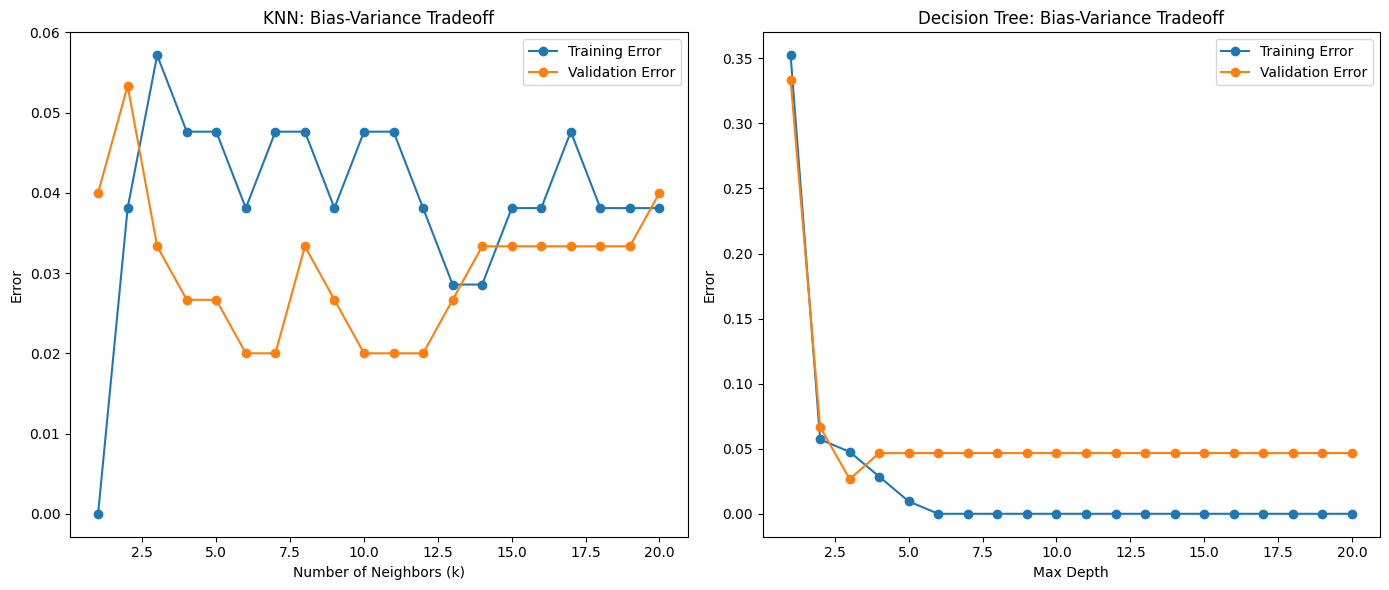

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters to test
k_values = range(1, 21)  # For KNN
max_depth_values = range(1, 21)  # For Decision Tree

# Initialize lists to store results
knn_train_errors = []
knn_val_errors = []

dt_train_errors = []
dt_val_errors = []

# KNN Bias-Variance Analysis
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate training and validation errors
    train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
    val_error = 1 - cross_val_score(knn, X, y, cv=5).mean()

    knn_train_errors.append(train_error)
    knn_val_errors.append(val_error)

# Decision Tree Bias-Variance Analysis
for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Calculate training and validation errors
    train_error = 1 - accuracy_score(y_train, dt.predict(X_train))
    val_error = 1 - cross_val_score(dt, X, y, cv=5).mean()

    dt_train_errors.append(train_error)
    dt_val_errors.append(val_error)

# Plot the Bias-Variance Tradeoff
plt.figure(figsize=(14, 6))

# KNN
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_train_errors, label="Training Error", marker='o')
plt.plot(k_values, knn_val_errors, label="Validation Error", marker='o')
plt.title("KNN: Bias-Variance Tradeoff")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error")
plt.legend()

# Decision Tree
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, dt_train_errors, label="Training Error", marker='o')
plt.plot(max_depth_values, dt_val_errors, label="Validation Error", marker='o')
plt.title("Decision Tree: Bias-Variance Tradeoff")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()

plt.tight_layout()
plt.show()
